[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980]


Text(0, 0.5, 'Amplitude [m]')

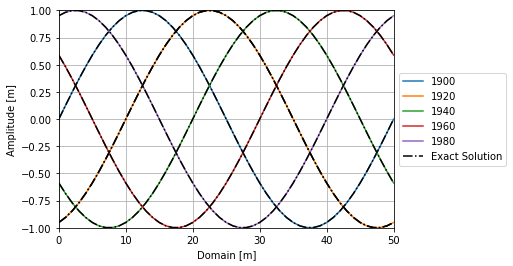

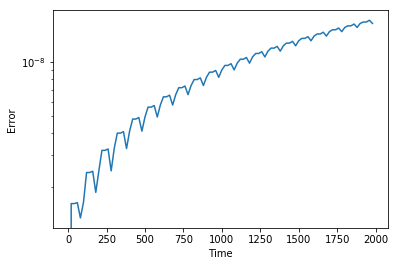

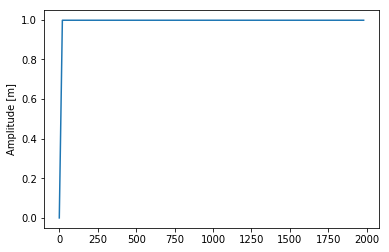

In [257]:
#LF Sine Wave


from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core

#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 2000.0
TStepSize = 2
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 1 #Starting Time Step 
CurStep = TStartingStep


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

#XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return((A*math.sin(2*pi*(x- C * t )/Wavelength_int)))


#For Square Wave Problem

def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#TEMPORARY array: 
u_older = np.zeros([Nx])
u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])

#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_older[j] = ((A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))

u_old = np.copy(u_older)

for j in range(0,Nx):
    u_exact[j] = ((A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))


    
#**************************************#
#advance first step: FTFS



for i in range(1, Nx-1): #grid loop
    u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
       
    #implement boundary conditions:
        
   
u_new[Nx-1] = u_old[Nx-1] - CourantNum*(u_old[Nx-1] - u_old[Nx-2])
u_new[0] = u_new[Nx-1] 
    
u_old = np.copy(u_new)
#u_new = np.copy(u_old)


CurStep +=1
        

#**************************************#
#Saving arrays: 


timeInterval = 10.0  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)+1  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)+1  ,Nx], dtype=float)




#u_Amp_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeStepList = []
ampList = []

#**************************************#

#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_exact
u_exact_solution[0] = u_exact

errorList += [0]
timeStepList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1 #1 element has been filled up



            #range --> first number inclusive, last number exclusive!!!

for CurStep in range(CurStep,Nt): #time loop
    CurrentTime = CurStep*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_older[i] - CourantNum*(u_old[i+1] -u_old[i-1])
       
    #implement boundary conditions:
        
   
    u_new[Nx-1] = u_older[Nx-1] - CourantNum*(u_old[1] - u_old[Nx-2]) #u_old[Nx] == u_old [1]
    u_new[0] = u_new[Nx-1] 
    
        
        
    #shifting:
    u_older = np.copy(u_old)  
    u_old = np.copy(u_new)
    
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = (exactSolution( a*XStepSize, CurrentTime))
        
    #calculate error:
    error = max(abs(u_exact[0:Nx-1]-u_old[0:Nx-1])) 
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (CurStep)%timeInterval == 0:
        u_OneTimeStep[counter]= u_old
        u_exact_solution[ counter] = u_exact
        errorList += [(error)]
        timeStepList += [(CurrentTime)]   #time step or time????
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeStepList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeStepList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""





#plt.plot(grid, u_OneTimeStep[0])


plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(len(u_OneTimeStep)-6, len(u_OneTimeStep)-1):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i],'-.k', c = 'k')
plt.plot(grid, u_exact_solution[1],'-.k', c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )



print(timeStepList)


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
plt.ylim(-1,1) # sets the limits of the y axis to show
plt.save

plt.figure(1) 
plt.plot(timeStepList, errorList)
plt.yscale('log')
plt.xscale('linear')  
plt.xlabel('Time') # labels the x axis
plt.ylabel('Error') # labels the y axis
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""
for i in range(0,len(u_exact_solution)):
    plt.plot(grid, u_exact_solution[i] , c= 'k')
"""
plt.figure(2) 
plt.plot( timeStepList,ampList)
plt.yscale('linear')
plt.xscale('linear')
plt.ylabel('Amplitude [m]')




#OBSERVATION: AMPLITUDE DOESN'T CHANGE

(0, 2000)

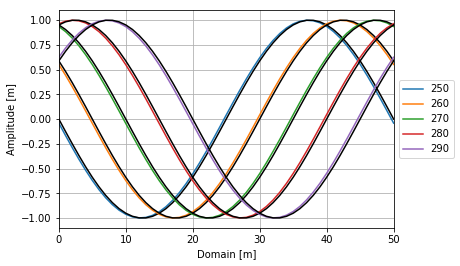

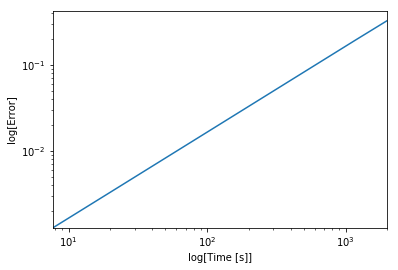

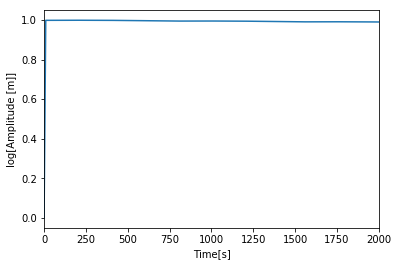

In [214]:
#RK3  Sine WAVE
from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 2000.0
TStepSize = 2
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 1 #Starting Time Step 
CurStep = TStartingStep


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 50.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return (A*math.sin(2*pi*(x- C * t )/Wavelength_int))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_inter = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = ((A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))
    
for j in range(0,Nx):
    u_exact[j] = ((A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))

#**************************************#
#Saving arrays: 



timeInterval = 5  #Time Interval Between saving = 10 
#Time Interval --> 80 for clarity

u_OneTimeStep = np.zeros([int(Nt/timeInterval)+1  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)+1  ,Nx], dtype=float)




#u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeStepList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeStepList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1

u_inter = u_old #storing initial value inside u_inter first

            #range --> first number inclusive, last number exclusive!!!

for CurStep in range(CurStep,Nt+1): #time loop
    CurrentTime = CurStep*TStepSize
    
    
    
    #********RK-1
    
    for i in range(1, Nx-1): #grid loop
        #u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        u_new[i] = u_inter[i]  + (TStepSize/3) *(-C/(2*XStepSize))*(u_old[i+1]-u_old[i-1])

        #BC
    u_new[Nx-1] = u_inter[Nx-1]  + (TStepSize/3) *(-C/(2*XStepSize))*(u_old[1]-u_old[Nx-2]) #u_old[Nx] = [1] 
    u_new[0] = u_new[Nx-1]
    
    u_old = np.copy(u_new)
    
    
    #********RK-2
    
    for i in range(1, Nx-1): #grid loop
        #u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        u_new[i] = u_inter[i]  + (TStepSize/2) *(-C/(2*XStepSize))*(u_old[i+1]-u_old[i-1])
        
        #BC
    u_new[Nx-1] = u_inter[Nx-1]  + (TStepSize/2) *(-C/(2*XStepSize))*(u_old[1]-u_old[Nx-2]) #u_old[Nx] = [1] 
    u_new[0] = u_new[Nx-1]
    
    u_old = np.copy(u_new)
    
    #********RK-3
    
    for i in range(1, Nx-1): #grid loop
        #u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        u_new[i] = u_inter[i]  + (TStepSize) *(-C/(2*XStepSize))*(u_old[i+1]-u_old[i-1])
        
        #BC
    u_new[Nx-1] = u_inter[Nx-1]  + (TStepSize) *(-C/(2*XStepSize))*(u_old[1]-u_old[Nx-2]) #u_old[Nx] = [1] 
    u_new[0] = u_new[Nx-1]
    

    
        
        
    #implement boundary conditions: 
        
    #shifting:
        
    u_old = np.copy(u_new)
    
    #!!!!!! 
    u_inter = np.copy(u_old) #stores the old value
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = (exactSolution( a*XStepSize, CurrentTime))
        
    #calculate error:
    error = max(abs(u_exact[0:Nx-1]-u_old[0:Nx-1]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (CurStep)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [((error))]
        timeStepList += [((CurrentTime))]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeStepList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeStepList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(25, 30):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
#plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeStepList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
#plt.ylim(-1.2,1.2) # sets the limits of the y axis to show

#plt.savefig('#1,Waveform.pdf', bbox_inches='tight') 

#Note that the bbox_extra_artists must be an iterable

#***************************************#
#error-time 
plt.figure(1)
plt.yscale('log')
plt.xscale('log')
plt.plot((timeStepList),(errorList))

plt.xlabel('log[Time [s]]')
plt.ylabel('log[Error]')
#plt.ylim(0,10**-9)
plt.xlim(0,2000) 
#plt.savefig('1.pdf', bbox_inches='tight') 


#****************************************#
plt.figure(2)

plt.plot((timeStepList),(ampList))
plt.yscale('linear')
plt.xscale('linear')
plt.xlabel('Time[s]')
plt.ylabel('log[Amplitude [m]]')
plt.xlim(0,2000)

#plt.savefig('2.pdf', bbox_inches='tight') 

(0, 2000)

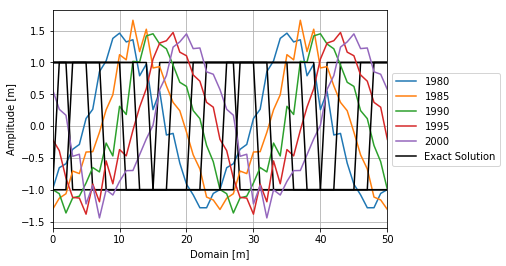

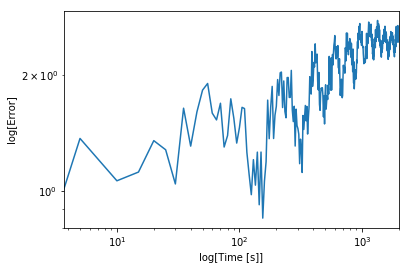

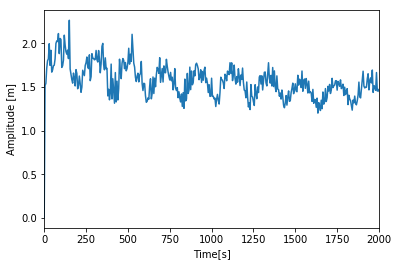

In [251]:
### RK3  Square WAVE
from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 2000.0
TStepSize = 1.0
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 1 #Starting Time Step 
CurStep = TStartingStep


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 25.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return sign((A*math.sin(2*pi*(x- C * t )/Wavelength_int)))


#For Square Wave Problem
def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#variable array: 

u_old = np.zeros([Nx])
u_inter = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])
#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_old[j] = sign((A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))
    
for j in range(0,Nx):
    u_exact[j] = sign((A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))

#**************************************#
#Saving arrays: 



timeInterval = 5  #Time Interval Between saving = 10 
#Time Interval --> 80 for clarity

u_OneTimeStep = np.zeros([int(Nt/timeInterval)+1  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)+1  ,Nx], dtype=float)




#u_Time_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeStepList = []
ampList = []

#**************************************#
counter = 0
#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old
u_exact_solution[0] = u_exact

errorList += [0]
timeStepList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1

u_inter = u_old #storing initial value inside u_inter first

            #range --> first number inclusive, last number exclusive!!!

for CurStep in range(CurStep,Nt+1): #time loop
    CurrentTime = CurStep*TStepSize
    
    
    
    #********RK-1
    
    for i in range(1, Nx-1): #grid loop
        #u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        u_new[i] = u_inter[i]  + (TStepSize/3) *(-C/(2*XStepSize))*(u_old[i+1]-u_old[i-1])

        #BC
    u_new[Nx-1] = u_inter[Nx-1]  + (TStepSize/3) *(-C/(2*XStepSize))*(u_old[1]-u_old[Nx-2]) #u_old[Nx] = [1] 
    u_new[0] = u_new[Nx-1]
    
    u_old = np.copy(u_new)
    
    
    #********RK-2
    
    for i in range(1, Nx-1): #grid loop
        #u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        u_new[i] = u_inter[i]  + (TStepSize/2) *(-C/(2*XStepSize))*(u_old[i+1]-u_old[i-1])
        
        #BC
    u_new[Nx-1] = u_inter[Nx-1]  + (TStepSize/2) *(-C/(2*XStepSize))*(u_old[1]-u_old[Nx-2]) #u_old[Nx] = [1] 
    u_new[0] = u_new[Nx-1]
    
    u_old = np.copy(u_new)
    
    #********RK-3
    
    for i in range(1, Nx-1): #grid loop
        #u_new[i] = u_old[i] - CourantNum*(u_old[i] -u_old[i-1])
        u_new[i] = u_inter[i]  + (TStepSize) *(-C/(2*XStepSize))*(u_old[i+1]-u_old[i-1])
        
        #BC
    u_new[Nx-1] = u_inter[Nx-1]  + (TStepSize) *(-C/(2*XStepSize))*(u_old[1]-u_old[Nx-2]) #u_old[Nx] = [1] 
    u_new[0] = u_new[Nx-1]
    

    
        
        
    #implement boundary conditions: 
        
    #shifting:
        
    u_old = np.copy(u_new)
    
    #!!!!!! 
    u_inter = np.copy(u_old) #stores the old value
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = sign(exactSolution( a*XStepSize, CurrentTime))
        
    #calculate error:
    error = max(abs(u_exact[0:Nx]-u_old[0:Nx]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (CurStep)%timeInterval == 0:
        u_OneTimeStep[counter] = u_old
        u_exact_solution[counter] = u_exact
        errorList += [((error))]
        timeStepList += [((CurrentTime))]
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeStepList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeStepList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""



plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(len(u_OneTimeStep)-5, len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i], c = 'k')
plt.plot(grid, u_exact_solution[1], c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""   
plt.plot( timeStepList,ampList,)
plt.yscale('log')
plt.xscale('linear')
"""


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
#plt.ylim(-1.2,1.2) # sets the limits of the y axis to show

#plt.savefig('#1,Waveform.pdf', bbox_inches='tight') 

#Note that the bbox_extra_artists must be an iterable

#***************************************#
#error-time 
plt.figure(1)
plt.yscale('log')
plt.xscale('log')
plt.plot((timeStepList),(errorList))

plt.xlabel('log[Time [s]]')
plt.ylabel('log[Error]')
#plt.ylim(0,10**-9)
plt.xlim(0,2000) 
#plt.savefig('1.pdf', bbox_inches='tight') 


#****************************************#
plt.figure(2)
plt.yscale('linear')
plt.xscale('linear')
plt.plot((timeStepList),(ampList))

plt.xlabel('Time[s]')
plt.ylabel('Amplitude [m]')
plt.xlim(0,2000)

#plt.savefig('2.pdf', bbox_inches='tight') 


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 101

Text(0, 0.5, 'log[Amplitude] ')

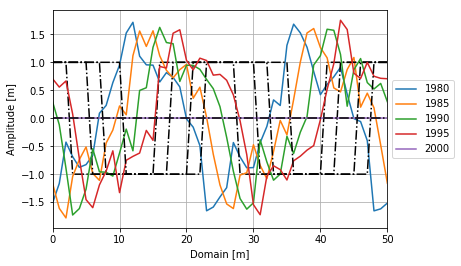

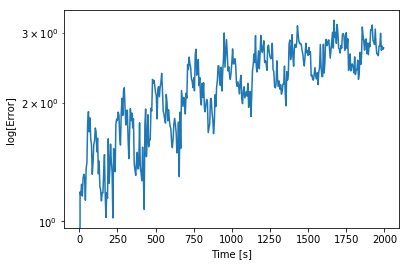

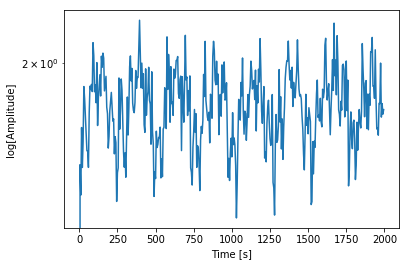

In [250]:
#LF Square WAVE

from numpy import math
import numpy as np

#DON'T COMPUTE CONDITIONS AT THE LAST TIMESTEP????
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core

#DECLARING CONSTANTS:

#*****************************************#
#Declare variables:

#CONSTANTS:

Ttot = 2000.0
TStepSize = 1
Nt = int(Ttot/TStepSize) #total number of time steps (need to add 1?) 100

TStartingStep = 1 #Starting Time Step 
CurStep = TStartingStep


Xtot = 50 #total distance
XStepSize = 1 
Nx = int(Xtot/XStepSize + 1)  #total number of grid sizes = 51

#XStartingStep = 0 #Starting Grid Step

#!!! 51 grid points in 50m

C = 0.5 #initial velocity 
A = 1.0 #initial amplitude

Wavelength_int = 25.0 #QUESTION: WAVELENGTH UNCHANGED OVERALL????

pi = float(3.141592654)

CourantNum = C*TStepSize/XStepSize




#**************************************#
#Exact Solution:
def exactSolution(x,t):
    return sign((A*math.sin(2*pi*(x- C * t )/Wavelength_int)))


#For Square Wave Problem

def sign (x):
    if (x < 0):
        return -1
    elif (x == 0):
        return 0
    elif (x > 0):
        return 1



#**************************************#
#TEMPORARY array: 
u_older = np.zeros([Nx])
u_old = np.zeros([Nx])
u_new = np.zeros([Nx])
u_exact = np.zeros([Nx])

#**************************************#
#initial conditions

#exact solution & numerical are the same!!!

for j in range(0,Nx):
    u_older[j] = sign((A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))



for j in range(0,Nx):
    u_exact[j] = sign((A*math.sin(2*pi*(XStepSize*j)/Wavelength_int)))


    
#**************************************#
#advance first step: FTbS



for i in range(1, Nx-1): #grid loop
    u_old[i] = u_older[i] - CourantNum*(u_older[i] -u_older[i-1])
       
    #implement boundary conditions:
        

u_old[Nx-1] = u_older[Nx-1] - CourantNum*(u_older[Nx-1] - u_older[Nx-2])
u_old[0] = u_old[Nx-1] 
    



CurStep +=1
        

#**************************************#
#Saving arrays: 


timeInterval = 5.0  #Time Interval Between saving = 10

u_OneTimeStep = np.zeros([int(Nt/timeInterval)+1  ,Nx],dtype=float)
u_exact_solution = np.zeros([int(Nt/timeInterval)+1  ,Nx], dtype=float)




#u_Amp_Final = np.zeros([Nt],dtype=float) #storing max amplitude at each time step 


errorList= []
timeStepList = []
ampList = []

#**************************************#

#putting initial conditions in the saving array:
u_OneTimeStep[0] = u_old #comebackhere!!!
u_exact_solution[0] = u_exact

errorList += [0]
timeStepList += [0]
ampList += [0]
#*************************************#
#grid point array

grid = []
for i in range(0,Nx):
    grid+= [XStepSize*i]


#**************************************#


#main loop 


counter = 1 #1 element has been filled up



            #range --> first number inclusive, last number exclusive!!!

for CurStep in range(CurStep,Nt): #time loop
    CurrentTime = CurStep*TStepSize
    
    for i in range(1, Nx-1): #grid loop
        u_new[i] = u_older[i] - CourantNum*(u_old[i+1] -u_old[i-1])
       
    #implement boundary conditions:
        
    
    u_new[Nx-1] = u_older[Nx-1] - CourantNum*(u_old[1] - u_old[Nx-2]) #u_old[Nx] == u_old [1]
    u_new[0] = u_new[Nx-1] 
    
    if (CurStep ==2):
        for i in range(0,len(u_new)):
            if (i >= 45 and i <= 50) or (i == 0):
                u_new[i] = -1.0
                
    
        
        
    #shifting:
    u_older = np.copy(u_old)  
    u_old = np.copy(u_new)
    
        
    #calculate exact solution:
    for a in range(0,Nx):
        u_exact[a] = sign(exactSolution( a*XStepSize, CurrentTime))
        
    #calculate error:
    error = max(abs(u_exact[0:Nx-1]-u_old[0:Nx-1]))
    #print(u_old,[CurrentTime])
    
    #calculate amplitude:
    amp = max(abs(u_old[0:Nx]))
    
    if (CurStep)%timeInterval == 0:
        u_OneTimeStep[counter]= u_old
        u_exact_solution[ counter] = u_exact
        errorList += [(error)]
        timeStepList += [(CurrentTime)]   #time step or time????
        ampList += [amp]
        counter+=1
        
#print((u_OneTimeStep))
#print(errorList)
#print(timeStepList)
#length of u_OneTimeStep = 10

#error plot
"""
plt.plot((timeStepList),(errorList))
plt.yscale('log')
plt.xscale('log')

"""





#plt.plot(grid, u_OneTimeStep[0])


plt.figure(0)

#plt.plot(grid, u_OneTimeStep[0])

for i in range(len(u_OneTimeStep)-5,len(u_OneTimeStep)):
    if i == 0:
        label = 'Initial Condition'
    else:
        label = (int(i*timeInterval*TStepSize))
        
        
        
    
    plt.plot(grid, u_OneTimeStep[i],label = label)
    plt.plot(grid, u_exact_solution[i],'-.k', c = 'k')
#plt.plot(grid, u_exact_solution[1],'-.k', c = 'k',label = 'Exact Solution' )
#plt.plot(grid, u_exact_solution[0], c = 'k' )



print(timeStepList)


    

#------
# These commands give the final adjustments to the figure
plt.grid()  # puts the grid in the figure
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) # place the legend in the right place
plt.xlabel('Domain [m]') # labels the x axis
plt.ylabel('Amplitude [m]') # labels the y axis
plt.xlim(0,50) # sets the limits of the x axis to show
#plt.ylim(-1.2,1.2) # sets the limits of the y axis to show


plt.figure(1) 
plt.plot(timeStepList, errorList)
plt.yscale('log')
plt.xscale('linear')    
plt.xlabel('Time [s]') # labels the x axis
plt.ylabel('log[Error] ') # labels the y axis
#plt.plot(grid, u_exact_solution[0], c = 'k' )


"""
for i in range(0,len(u_exact_solution)):
    plt.plot(grid, u_exact_solution[i] , c= 'k')
"""
plt.figure(2)
plt.plot( timeStepList,ampList)
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Time [s]') # labels the x axis
plt.ylabel('log[Amplitude] ') # labels the y axis


#OBSERVATION: AMPLITUDE DOESN'T CHANGE